**Name-Surname:** Gianpietro Nicoletti <br>
**ID**: 2053042

In [1]:
import numpy as np

from scipy import optimize, stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
#do you need to create the folder and download the files?
DOWNLOAD_FILE = True

In [3]:
if(DOWNLOAD_FILE):
    !mkdir data/ #creating an empty folder

mkdir: impossibile creare la directory "data/": File già esistente


In [4]:
BOLD = "\033[1m"
END = "\033[0m"

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
lam = 6.3 #mean
std = np.sqrt(6.3)#standart deviation
x = 15

#p(n>=15) = 1 - p(n<=14)
p_15 = 1 - stats.poisson.cdf(k=14, mu=lam)

print(BOLD+"The probability of having 15 or more hurricanes in a year is: "+END+str(p_15))

The probability of having 15 or more hurricanes in a year is: 0.002217122790073134


In [6]:
#computing the Z-score
Z = abs(x-lam)/std

print(BOLD+"The Z-score is: "+END+str(Z))

The Z-score is: 3.4661629670697414


In [7]:
print("Considering the fact that the probability is very low and the Z-score is high, the event is significant")

Considering the fact that the probability is very low and the Z-score is high, the event is significant


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [8]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


n = 10
mu = np.mean(pre)
sample_mean = np.mean(post)
w = sample_mean - mu

#test stathistics
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma_pre = np.sqrt(np.var(pre,ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

#results
T = w/(sigma*np.sqrt(2/n)) #formula given by the exercise
print(BOLD+"T = "+END +str(T))
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print(BOLD+"p-value = "+END+str(pvalue))

alpha = 0.05 #standard value given
if pvalue < alpha/2:
    print(BOLD+"The change was stathistically significant."+END)
elif pvalue >= alpha/2:
    print(BOLD+"The change was not stathistically significant."+END)

T = 3.786997938137629
p-value = 1.9956975358671354
The change was not stathistically significant.


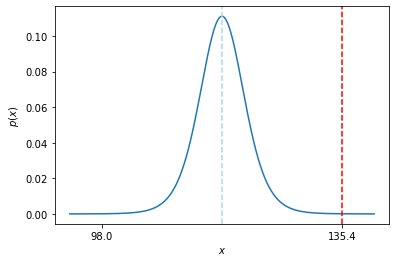

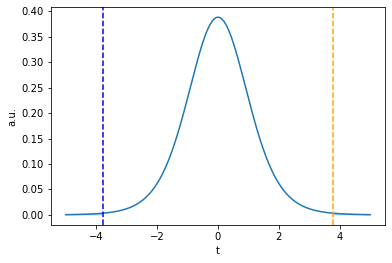

In [9]:
#plotting pdf of measurements and the results obtained

x = np.linspace(mu - w - 5, w + mu + 5, 1000)
y = stats.t.pdf(x, loc=mu, scale = sigma / np.sqrt(n), df = n - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

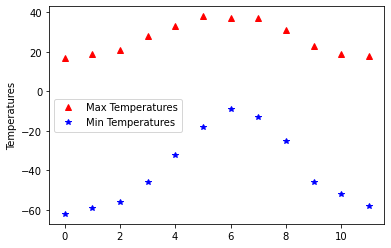

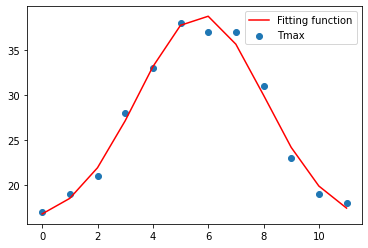

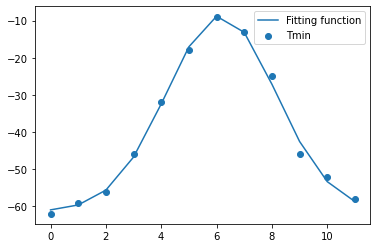

Both fitting are reasonable, though the fitting for the Tmin values required an initial guess to be correct.


In [10]:
#importing data
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
x = [i for i in range(len(Tmax))]

#setting the plot
plt.plot(x,Tmax, "r^", label = "Max Temperatures")
plt.plot(x,Tmin,"b*", label= "Min Temperatures")
plt.ylabel("Temperatures")
plt.legend()
plt.show()

def gauss_function(x,a, x0, sigma,d): #chosen function to fit data
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

popt1,pcov1 = optimize.curve_fit(gauss_function, x, Tmax, full_output=False)
popt2,pcov2 = optimize.curve_fit(gauss_function, x, Tmin, p0 = [50, 6, 1, -60],full_output=False)

plt.plot(x, gauss_function(x, *popt1), "r-", label = "Fitting function")
plt.scatter(x, Tmax, label="Tmax")
plt.legend()
plt.show()

plt.plot(x, gauss_function(x, *popt2), label = "Fitting function")
plt.scatter(x, Tmin, label="Tmin")
plt.legend()
plt.show()

print("Both fitting are reasonable, though the fitting for the Tmin values required an initial guess to be correct.")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [11]:
if(DOWNLOAD_FILE):
    !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-13 12:02:37--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [segue]
--2023-01-13 12:02:37--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf35b58313246831a349bdf76ad.dl.dropboxusercontent.com/cd/0/inline/B0eoBSPDWxvcKl9AEE-8M9bSJmUmBRDumnjkBxrPZdY9pnb1w8hT9kEpcupFnAnuSyWGsKNp0nLrakZKjkYxzlBIPmH5gtUDtKvNLJOYtfVxGbzEKDt_1slXpzpXJ0X5sMVIJ2sY4IPFpPFaTFWz5oHHtuXKTGnMuq4Z7eVr3clyaA/file# [segue]
--2023-01-13 12:02:38--  https://ucf35b58313246831a349bdf76ad.dl.dropboxusercontent.com/cd/0/inline/B0eoBSPDWxvcKl9AEE-8M9bSJmUmBRDumnjk

In [12]:
###importing data from file

df = pd.read_pickle("data/residuals_261.pkl")
df = pd.DataFrame(df.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


chi2 = 5657.117942081572
p-value = 0.0


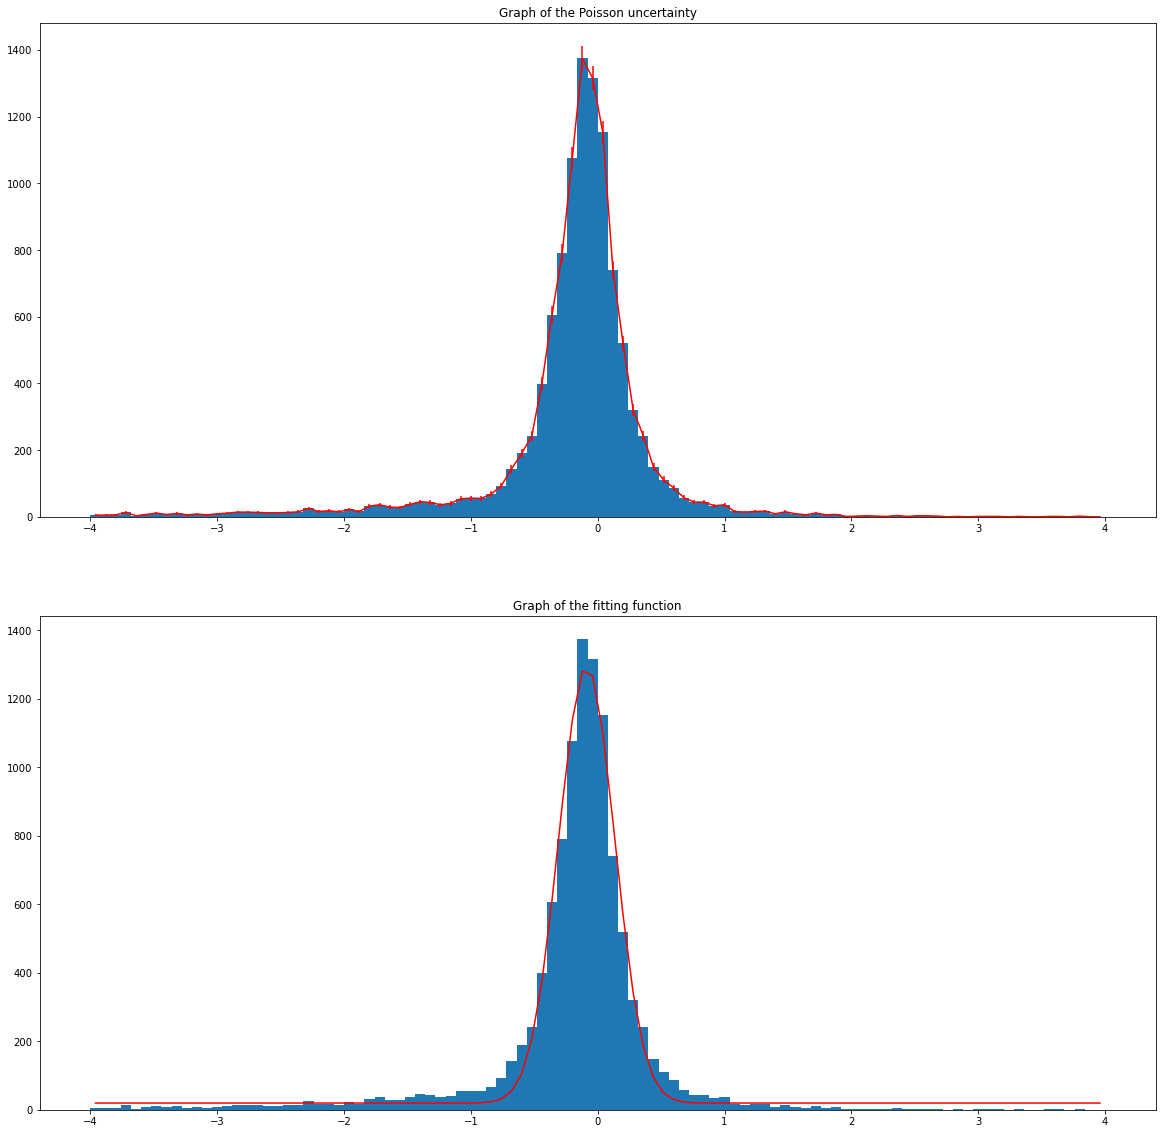

In [13]:
res = df["residuals"].to_numpy()
dist = df["distances"].to_numpy()

###plotting the data and determining the fitting function

fig,(ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,20))
b = 100 #setting the number of bins for the plot
h,bins,_ = ax1.hist(df["residuals"], bins = b, range = (-4,4))
bin_centres = (bins[:-1] + bins[1:])/2. #bin centres

sigma_y = np.sqrt(np.abs(h)) #poisson uncertainty
#print("standard deviation: ", sigma_y)

ax1.set_title("Graph of the Poisson uncertainty")
ax1.errorbar(x = bin_centres, y = h, yerr = sigma_y, color = 'red')
xmin,xmax = plt.xlim()

mu, std = stats.norm.fit(res) #getting mean and standard deviation
popt,pcov = optimize.curve_fit(gauss_function,bin_centres, h, p0 = [max(res),mu,std,0]) #also setting starting point

ax2.set_title("Graph of the fitting function")
ax2.hist(res,bins = b, range = (-4,4))
ax2.plot(bin_centres, gauss_function(bin_centres, *popt), color ="red")

###goodness-of-fit test
opt_val = tuple(popt)
#print("values: ", opt_val)
g_fit = gauss_function(bin_centres, *popt)
ndof = len(bin_centres) - 1 #degrees of freedom

chi2 = np.sum(((h - g_fit)**2) / std**2)
print("chi2 =", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [14]:
if(DOWNLOAD_FILE):
    !wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2023-01-13 12:02:40--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [segue]
--2023-01-13 12:02:40--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uccb6bffb405c678e1a8d94e8fdc.dl.dropboxusercontent.com/cd/0/inline/B0dR8zfbzoqROsufzK54SqkdIHKrZX8OgzL6pXIdRq8s8FJ-4k1GdKOxOmYH3hBb4WMQl3gML1SSEeHuDCAa6WJ6mq0TvWK__ytwLjdqE-Ijm5mBLwCu5Hz3X5rim-tP_dOROlhqj7pHIgw6ZgNTRfVW_qoLDZBHo8dbdUZqPULIOQ/file# [segue]
--2023-01-13 12:02:40--  https://uccb6bffb405c678e1a

The mean temperature in Munich is  9.261252084167237
Average temperature in hottest days:  24.907408333333336
Average temperature in coldest days:  -9.777784


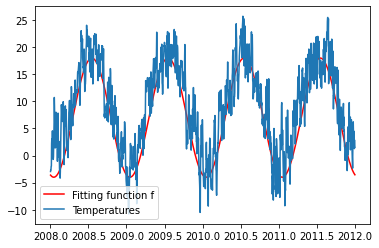

The parameter b is used as the phase of the cosine function, and it helps in correctly setting the starting point of the function according to the temperature values.


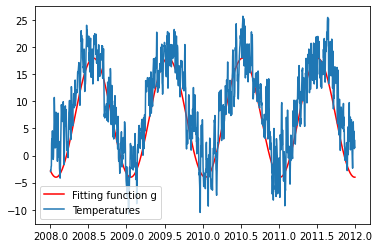

The SSR of the function f results  27090.211957471314
The SSR of the function g results  29893.488872361908
CL: 1.000 , additional parameter necessary: NO


In [15]:
def f(t,a,b,c): #function definition
    return a * np.cos(2*np.pi*t + b) + c

###importing data using pandas
data = pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", sep=" ", header=None)
data.columns = ["Year", "Temperature"]

dataf = data[(data["Year"] > 2008) & (data["Year"] < 2012)].reset_index() #extracting desired columns in new dataframe
dataf = dataf.drop(dataf[dataf["Temperature"] == 99.].index).reset_index() #clearing data from bad samples

x = dataf["Year"].to_numpy()
a,b,c = -11,6,7 #setting the parameters for the function

temp = dataf["Temperature"].to_numpy()
mean_T = np.mean(temp)
y1 = [f(x[i],a,b,c) for i in range(len(x))]
print("The mean temperature in Munich is ",mean_T)

av1 = dataf.nlargest(12, "Temperature") #getting the 10 hottest days (why two days at 99 degrees? Gonna delete them)
av1 = av1[av1["Temperature"] != 99.] #top 10 hottest days without weird numbers
av_hot = np.mean(av1["Temperature"].to_numpy())
print("Average temperature in hottest days: ", av_hot)

av2 = dataf.nsmallest(10, "Temperature")
av_cold = np.mean(av2["Temperature"].to_numpy())
print("Average temperature in coldest days: ", av_cold)

###plotting data
plt.plot(x, y1,"r-", label = "Fitting function f")
plt.plot(x, dataf["Temperature"], label = "Temperatures")
plt.legend()
plt.show()

print("The parameter b is used as the phase of the cosine function, and it helps in correctly setting the starting point of the function according to the temperature values.")

def g(t,a,b,c,d):
    return a * np.cos(2*np.pi*b*t + c) + d

a,b,c,d = -11,1.02,4.8,7
y2 = [g(x[i],a,b,c,d) for i in range(len(x))]
plt.plot(x, y2,"r-", label = "Fitting function g")
plt.plot(x, dataf["Temperature"], label = "Temperatures")
plt.legend()
plt.show()

###RSS of the functions
fSSR = 0
gSSR = 0

for i in range(len(x)-1):
    fSSR = fSSR + (temp[i] - y1[i])**2
    gSSR = gSSR + (temp[i] - y2[i])**2

print("The SSR of the function f results ", fSSR)
print("The SSR of the function g results ", gSSR)

#Fisher f-test

from scipy.stats import f

### Using the define function presented in lecture 08
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=True):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

f_vs_g = Ftest(fSSR, gSSR, 3,4, len(x))